## 伯努利概型
### 通用公式：
$P(y|\theta)=\begin{cases}
\theta&y=1\\
1-\theta&y=1
\end{cases}$
### 即：
$P(y|\theta)=\theta^y(1-\theta)^{1-y}$


## 交叉熵
### 基于极大似然估计的损失函数
nn.CrossEntropyLoss()

## logistic回归
$y=\frac{1}{1+e^{-(w^Tx+b)}}=sigmoid(w^Tx+b)$

In [1]:
import torch
from torch import nn, optim # 神经网络+优化函数
import matplotlib.pyplot as plt
from time import perf_counter

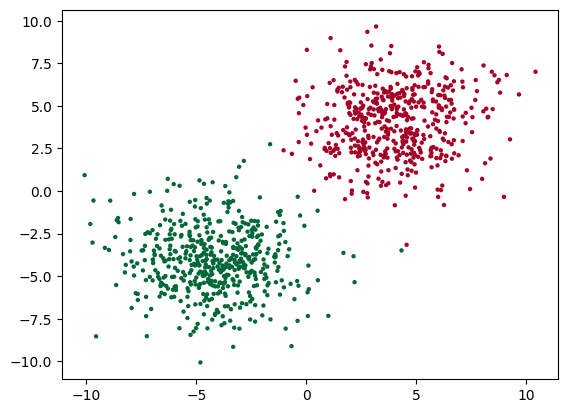

In [2]:
cluster = torch.ones(500,2)
data0 = torch.normal(cluster*4, 2)
data1 = torch.normal(cluster*-4, 2)
label0 = torch.zeros(500)
label1 = torch.ones(500)

x = torch.cat((data0,data1)).type(torch.FloatTensor)
y = torch.cat((label0,label1)).type(torch.LongTensor)

plt.scatter(x.numpy()[:, 0], x.numpy()[:, 1], c=y.numpy(), s=10, lw=0, cmap='RdYlGn')
plt.show()

In [3]:
class Net(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.linear = nn.Linear(2, 2)

    def forward(self, x):
        x = self.linear(x)
        x = torch.sigmoid(x) # sigmoid function 使数据转换为(0,1)之间的数
        return x

In [4]:
net = Net()
inputs = x
target = y
if torch.cuda.is_available():
    net = net.cuda()
    inputs = inputs.cuda()
    target = target.cuda()

optimizer = optim.SGD(net.parameters(), lr=0.02)
criterion = nn.CrossEntropyLoss()

In [5]:
def draw(output):
    output = torch.max((output), 1)[1]
    pred_y = output.data.numpy().squeeze()
    target_y = y.numpy()
    plt.scatter(x.numpy()[:, 0], x.numpy()[:, 1], c=pred_y, s=10, lw=0, cmap='RdYlGn')
    accuracy = sum(pred_y == target_y)/1000.0
    plt.text(1.5, -4, f'Accuracy={accuracy}', fontdict={'size': 20, 'color': 'red'})
    plt.pause(0.1)

def train(inputs, target, model, criterion, optimizer, epochs):
    start = perf_counter()
    output = None
    loss = None
    for epoch in range(epochs):
        output = model(inputs)
        loss = criterion(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if output is not None and loss is not None:
        draw(output.cpu())
    end = perf_counter()
    print(f"calculate time: {end-start}")
    print(f"final loss:{loss.item()}")
    print("weights:", list(net.parameters()))
    return model, loss

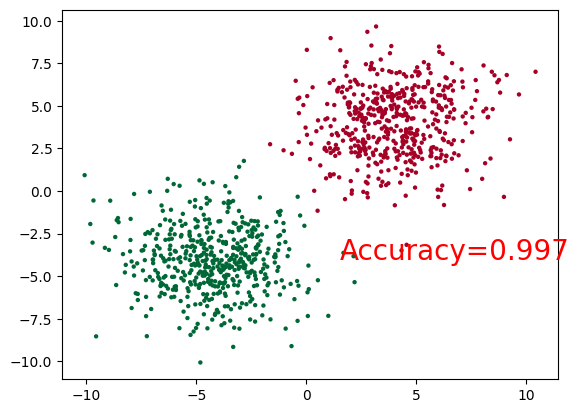

calculate time: 2.1286223999995855
final loss:0.32713788747787476
weights: [Parameter containing:
tensor([[ 0.5497,  0.6019],
        [-0.9494, -0.5929]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([ 0.5735, -0.1079], device='cuda:0', requires_grad=True)]


In [6]:
net, loss = train(inputs, target, net, criterion, optimizer, 1000)